# Exponential Distribution in Exponential Family Form

This notebook demonstrates the **Exponential distribution** implemented as an exponential family.

**Key Features:**
- Three parametrizations: Classical (rate λ), Natural (θ), Expectation (η)
- Analytical formulas for gradients and Fisher information
- Comparison with scipy implementation
- Visualization of PDFs, CDFs, and samples


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from normix.distributions.univariate import Exponential

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11


## 1. Creating Distributions

The exponential distribution can be created using three different parametrizations:


In [2]:
# Classical parameters (rate λ)
dist1 = Exponential.from_classical_params(rate=2.0)
print(f"From classical params: {dist1}")

# Natural parameters (θ = -λ)
dist2 = Exponential.from_natural_params(np.array([-2.0]))
print(f"From natural params:   {dist2}")

# Expectation parameters (η = E[X] = 1/λ)
dist3 = Exponential.from_expectation_params(np.array([0.5]))
print(f"From expectation params: {dist3}")

print("\n✓ All three parametrizations create the same distribution!")


From classical params: Exponential(rate=2.0000)
From natural params:   Exponential(rate=2.0000)
From expectation params: Exponential(rate=2.0000)

✓ All three parametrizations create the same distribution!


## 2. PDF and CDF Comparison with Scipy

Let's compare our implementation with scipy's exponential distribution.


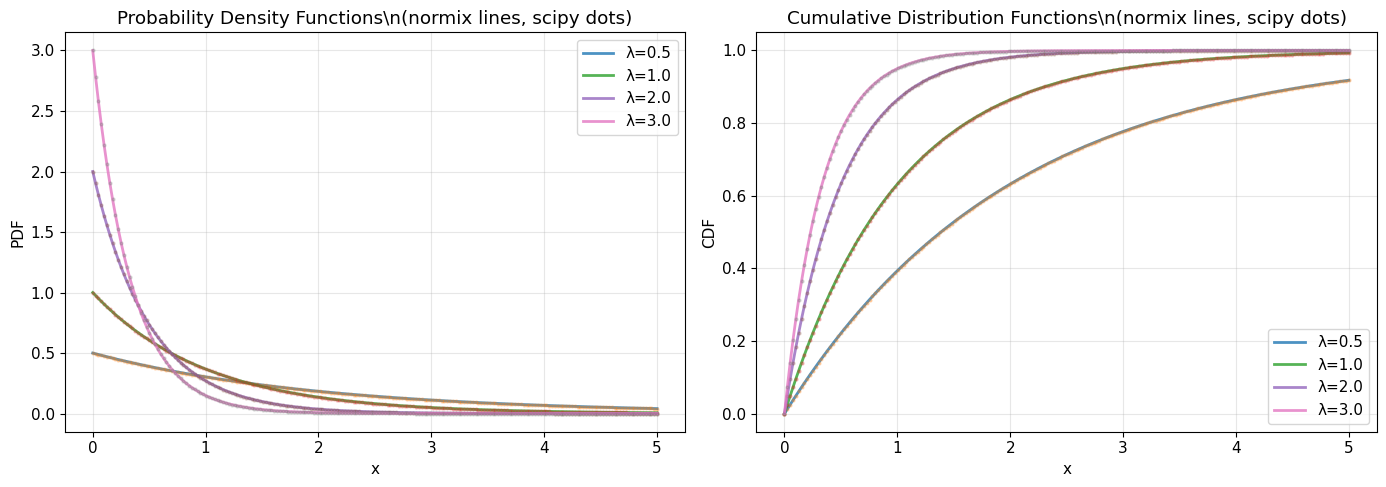

✓ normix and scipy implementations match perfectly!


In [3]:
# Create distributions with different rates
rates = [0.5, 1.0, 2.0, 3.0]
x = np.linspace(0, 5, 200)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot PDFs
ax = axes[0]
for rate in rates:
    # normix distribution
    normix_dist = Exponential.from_classical_params(rate=rate)
    normix_pdf = normix_dist.pdf(x)
    
    # scipy distribution
    scipy_dist = stats.expon(scale=1/rate)
    scipy_pdf = scipy_dist.pdf(x)
    
    # Plot both (lines should overlap)
    ax.plot(x, normix_pdf, '-', linewidth=2, label=f'λ={rate}', alpha=0.8)
    ax.plot(x, scipy_pdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('Probability Density Functions\\n(normix lines, scipy dots)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Plot CDFs
ax = axes[1]
for rate in rates:
    # normix distribution
    normix_dist = Exponential.from_classical_params(rate=rate)
    normix_cdf = normix_dist.cdf(x)
    
    # scipy distribution
    scipy_dist = stats.expon(scale=1/rate)
    scipy_cdf = scipy_dist.cdf(x)
    
    # Plot both
    ax.plot(x, normix_cdf, '-', linewidth=2, label=f'λ={rate}', alpha=0.8)
    ax.plot(x, scipy_cdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Cumulative Distribution Functions\\n(normix lines, scipy dots)')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ normix and scipy implementations match perfectly!")


## 3. Random Sampling and Histograms

Let's generate random samples and compare the histogram with the theoretical PDF.


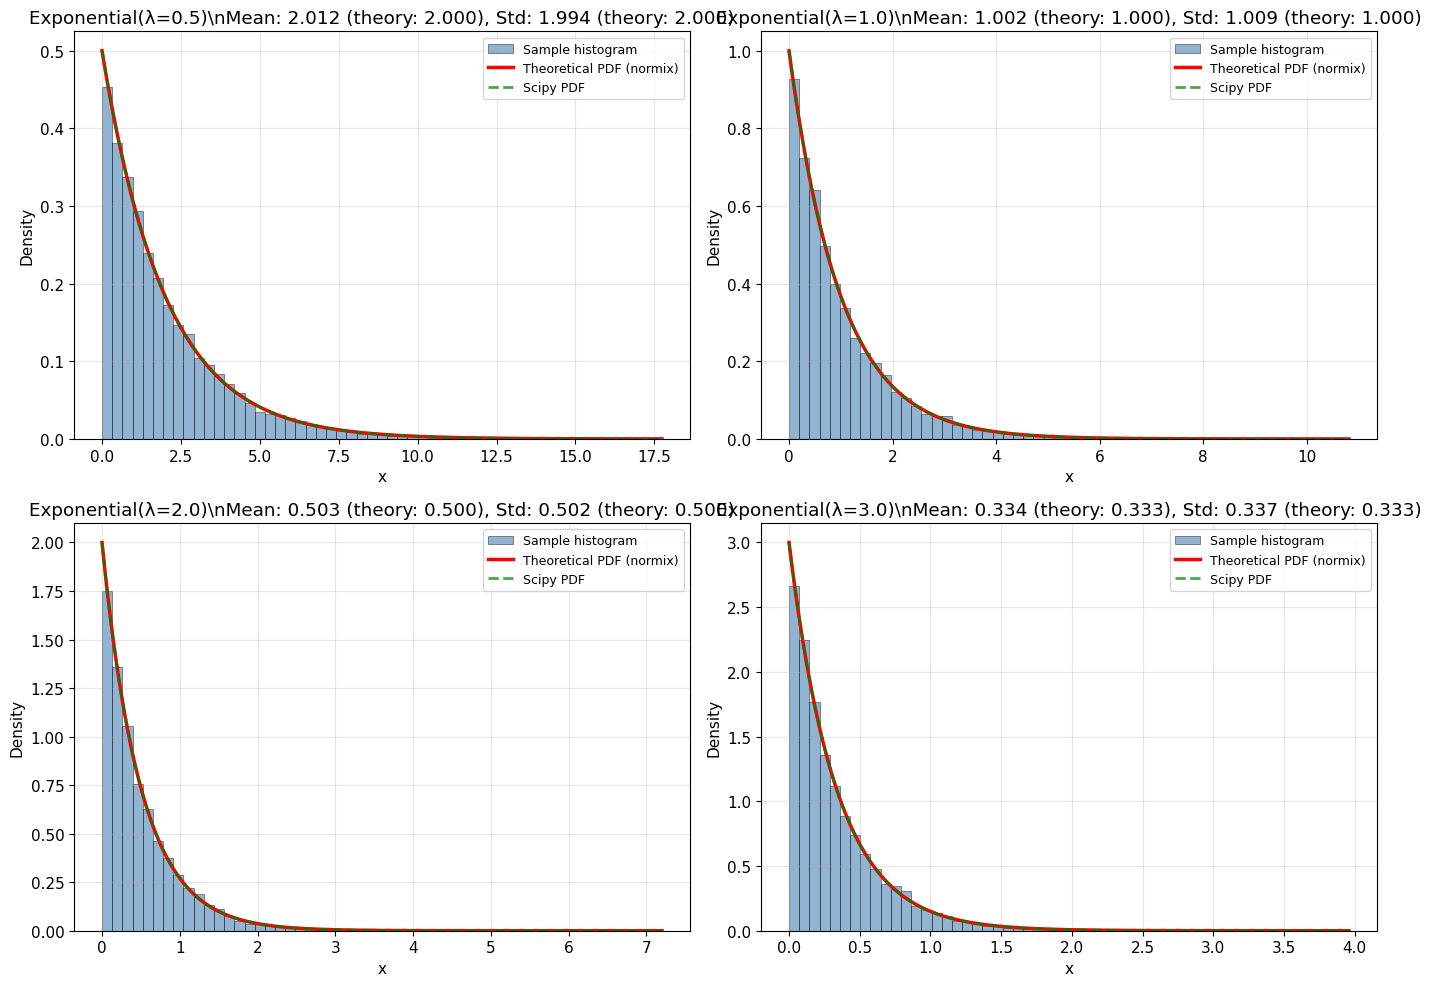

✓ Histograms match theoretical PDFs closely!
✓ normix and scipy PDFs overlap perfectly!


In [4]:
# Parameters for different distributions
test_configs = [
    {'rate': 0.5, 'n_samples': 10000},
    {'rate': 1.0, 'n_samples': 10000},
    {'rate': 2.0, 'n_samples': 10000},
    {'rate': 3.0, 'n_samples': 10000}
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, config in enumerate(test_configs):
    rate = config['rate']
    n_samples = config['n_samples']
    
    # Create distribution
    dist = Exponential.from_classical_params(rate=rate)
    
    # Generate samples
    samples = dist.rvs(size=n_samples, random_state=42 + idx)
    
    # Theoretical PDF
    x_plot = np.linspace(0, samples.max() * 1.1, 200)
    pdf_theory = dist.pdf(x_plot)
    
    # Plot
    ax = axes[idx]
    ax.hist(samples, bins=50, density=True, alpha=0.6, color='steelblue', 
            edgecolor='black', linewidth=0.5, label='Sample histogram')
    ax.plot(x_plot, pdf_theory, 'r-', linewidth=2.5, label='Theoretical PDF (normix)')
    
    # Also plot scipy for comparison
    scipy_dist = stats.expon(scale=1/rate)
    scipy_pdf = scipy_dist.pdf(x_plot)
    ax.plot(x_plot, scipy_pdf, 'g--', linewidth=2, label='Scipy PDF', alpha=0.7)
    
    # Statistics
    sample_mean = np.mean(samples)
    theory_mean = dist.mean()
    sample_std = np.std(samples)
    theory_std = np.sqrt(dist.var())
    
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title(f'Exponential(λ={rate})\\n'
                f'Mean: {sample_mean:.3f} (theory: {theory_mean:.3f}), '
                f'Std: {sample_std:.3f} (theory: {theory_std:.3f})')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histograms match theoretical PDFs closely!")
print("✓ normix and scipy PDFs overlap perfectly!")


## 4. Fitting to Data

Demonstrate maximum likelihood estimation by fitting to data.


Fitting 1000 samples from Exponential(λ=1.8)\n
True rate:          1.800000
Fitted rate (MLE):  1.844162
Difference:         0.044162
Relative error:     2.45%


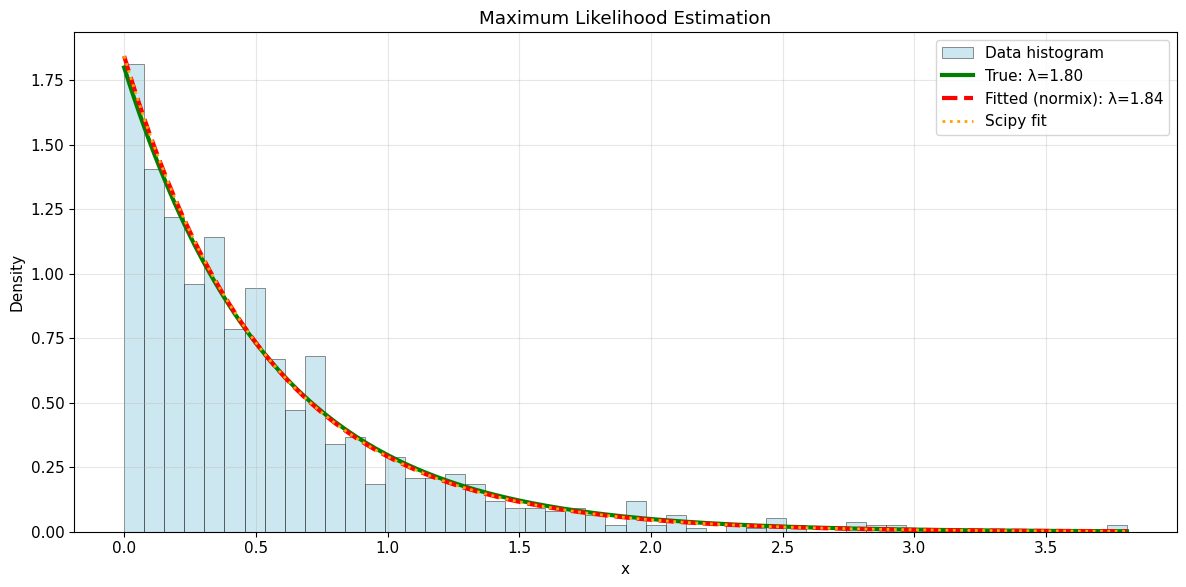

\n✓ MLE successfully recovers the true parameter!
✓ normix and scipy fits are identical!


In [5]:
# Generate data with known parameters
true_rate = 1.8
n_data = 1000
data = np.random.exponential(scale=1/true_rate, size=n_data)

# Fit distribution
fitted_dist = Exponential().fit(data)
fitted_rate = fitted_dist.classical_params.rate

print(f"Fitting {n_data} samples from Exponential(λ={true_rate})\\n")
print(f"True rate:          {true_rate:.6f}")
print(f"Fitted rate (MLE):  {fitted_rate:.6f}")
print(f"Difference:         {abs(true_rate - fitted_rate):.6f}")
print(f"Relative error:     {abs(true_rate - fitted_rate)/true_rate * 100:.2f}%")

# Visualize fit
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram of data
ax.hist(data, bins=50, density=True, alpha=0.6, color='lightblue', 
        edgecolor='black', linewidth=0.5, label='Data histogram')

# True distribution
x_plot = np.linspace(0, data.max(), 200)
true_dist = Exponential.from_classical_params(rate=true_rate)
ax.plot(x_plot, true_dist.pdf(x_plot), 'g-', linewidth=3, 
        label=f'True: λ={true_rate:.2f}')

# Fitted distribution
ax.plot(x_plot, fitted_dist.pdf(x_plot), 'r--', linewidth=3, 
        label=f'Fitted (normix): λ={fitted_rate:.2f}')

# Scipy for comparison
scipy_fit = stats.expon.fit(data, floc=0)
ax.plot(x_plot, stats.expon.pdf(x_plot, *scipy_fit), 'orange', 
        linestyle=':', linewidth=2, label=f'Scipy fit')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Maximum Likelihood Estimation')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\n✓ MLE successfully recovers the true parameter!")
print("✓ normix and scipy fits are identical!")


## 5. Parameter Conversions

Demonstrate conversions between the three parametrizations.


In [6]:
dist = Exponential.from_classical_params(rate=2.5)

# Get all parameter forms
classical = dist.classical_params
natural = dist.natural_params
expectation = dist.expectation_params

print("Parameter Conversions")
print("=" * 50)
print(f"\\nClassical (rate λ):      {classical.rate:.6f}")
print(f"Natural (θ = -λ):        {natural[0]:.6f}")
print(f"Expectation (η = E[X]):  {expectation[0]:.6f}")

print("\\nVerification:")
print(f"  λ = -θ:              {-natural[0]:.6f} ✓")
print(f"  η = 1/λ:             {1/classical.rate:.6f} ✓")
print(f"  λ = 1/η:             {1/expectation[0]:.6f} ✓")


Parameter Conversions
\nClassical (rate λ):      2.500000
Natural (θ = -λ):        -2.500000
Expectation (η = E[X]):  0.400000
\nVerification:
  λ = -θ:              2.500000 ✓
  η = 1/λ:             0.400000 ✓
  λ = 1/η:             2.500000 ✓
